<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Entendendo-os-Dados" data-toc-modified-id="Entendendo-os-Dados-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Entendendo os Dados</a></span><ul class="toc-item"><li><span><a href="#Analisando-Atributos" data-toc-modified-id="Analisando-Atributos-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Analisando Atributos</a></span></li><li><span><a href="#Cruzando-Informações" data-toc-modified-id="Cruzando-Informações-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Cruzando Informações</a></span></li></ul></li><li><span><a href="#Tratando-os-Dados" data-toc-modified-id="Tratando-os-Dados-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Tratando os Dados</a></span><ul class="toc-item"><li><span><a href="#Tipos-Primitivos" data-toc-modified-id="Tipos-Primitivos-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Tipos Primitivos</a></span></li><li><span><a href="#Dados-Nulos" data-toc-modified-id="Dados-Nulos-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Dados Nulos</a></span><ul class="toc-item"><li><span><a href="#GeoPy-e-API-de-Localização" data-toc-modified-id="GeoPy-e-API-de-Localização-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>GeoPy e API de Localização</a></span></li><li><span><a href="#Definindo-Preenchimento" data-toc-modified-id="Definindo-Preenchimento-2.2.2"><span class="toc-item-num">2.2.2&nbsp;&nbsp;</span>Definindo Preenchimento</a></span></li></ul></li><li><span><a href="#Entradas-Categóricas" data-toc-modified-id="Entradas-Categóricas-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Entradas Categóricas</a></span></li><li><span><a href="#Transformações-nos-Dados" data-toc-modified-id="Transformações-nos-Dados-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Transformações nos Dados</a></span><ul class="toc-item"><li><span><a href="#Coluna-Event-Date" data-toc-modified-id="Coluna-Event-Date-2.4.1"><span class="toc-item-num">2.4.1&nbsp;&nbsp;</span>Coluna Event Date</a></span></li><li><span><a href="#Coluna-Dia-da-Semana" data-toc-modified-id="Coluna-Dia-da-Semana-2.4.2"><span class="toc-item-num">2.4.2&nbsp;&nbsp;</span>Coluna Dia da Semana</a></span></li></ul></li></ul></li><li><span><a href="#Conclusão" data-toc-modified-id="Conclusão-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Conclusão</a></span></li></ul></div>

**<font size="6.5">Global Terrorism Database</font>**

Neste notebook, iremos trabalhar com um dataset contendo informações sobre ataques terroristas ao redor do mundo entre 1970 e 2017 (exceto 1993). Entre este período, mais de 180.000 registros foram coletados e disponibilizados por pesquisadores do National Consortium for the Study of Terrorism and Responses to Terrorism (START), na universidade de Maryland.

O conjunto de dados disponibilizado pelo [Kaggle](https://www.kaggle.com) pode ser encontrado [neste link](https://www.kaggle.com/START-UMD/gtd), bem como informações sobre o contexto, conteúdo, discussões e análises de outros usuários sobre este dataset. Visando aprimorar o aprendizado em diversas análises e a retirada de insights a partir de dados brutos, esta implementação irá aplicar técnicas de análise exploratória em Python e trará resultados explicativos sobre como as futuras conclusões foram pontuadas.

# Entendendo os Dados

Antes de realizar a leitura do arquivo `.csv`, vamos realizar um breve procedimento de entendimento dos dados e do conteúdo disponibilizado. Como informado no bloco introdutório acima, o dataset possui aproximadamente 180.000 instâncias espalhadas em 135 atributos que relacionam incidentes terroristas ao redor do mundo. Definição de terrorismo: _"Uso de força e violência ilegais por um indivíduo não estatal para atingir metas políticas, econômicas, religiosas ou sociais através do medo, coerção ou intimidação_".

Como temos um total de 135 atributos neste dataset, abaixo vamos detalhar apenas alguns dos mais importantes de acordo com as descrições proporcionadas pelo próprio Kaggle:

* **eventid** - ID de 12 dígitos que caracteriza o incidente. Os 8 primeiros dígitos referem-se a data na qual o incidente foi registrado `(yyyymmdd)`.
* **iyear** - Ano de acontecimento do incidente.
* **imonth** - Mês de acontecimento do incidente.
* **iday** - Dia de acontecimento do incidente.
* **approxdate<font color='red'>*</font>** - Data aproximada do incidente.
* **extended** - 1 = "Yes" significa que o incidente durou mais que 24h ; 0 = "No" significa que o incidente durou menos que 24h.
* <font color='red'>**resolution**</font> - `sem informações`.
* **country<font color='purple'>*</font>** - Código do país de acontecimento do incidente.
* **country_txt<font color='blue'>*</font>** - Nome do país de acontecimento do incidente.
* **region<font color='purple'>*</font>** - Código da região de acontecimento do incidente `código`.
* **region_txt** - Nome da região de acontecimento do incidente.
* **provstate<font color='blue'>*</font>** - Nome (no momento do incidente) da região subnacional administrativa de 1ª ordem.
* **city<font color='blue'>*</font>** - Cidade, vila ou município do incidente.
* **latitude** - Latitude da cidade onde o incidente ocorreu.
* **longitude** - Longitude da cidade onde o incidente ocorreu.
* **<font color='red'>specificity</font>** - `sem informações`, mas aparenta informar a magnitude do incidente.
* **<font color='red'>vicinity e location*</font>** - `sem informações`.
* **summary<font color='red'>*</font>** - `sem informações`, mas aparenta trazer uma breve descrição sobre o incidente.
* **<font color='red'>crit1, crit2, crit3 e doubtterr</font>** - `sem informações`.
* **alternative e alternative_txt<font color='red'>*</font>** - De certa forma categorizam o incidente em 5 tipos diferentes. 
* **<font color='red'>multiple</font>** - `sem informações`.
* **sucess** - Indica o sucesso do ataque terrorista.
* **suicide** - 1 = "Yes" indica um atentado suicida ; 0 = "No" indica que não foi um atentado suicida.
* **attacktype1<font color='purple'>*</font>** - Código que relaciona o método de ataque do incidente.
* **attacktype1_txt** - Nome que relaciona o método de ataque do incidente.
* **<font color='red'>attacktype2, attacktype2_txt, attacktype3 e attacktype3_txt</font>** - `sem informações`, mas provavelmente indicam mais métodos de ataque.
* **targtype1<font color='purple'>*</font>** - Código que relaciona o alvo do ataque terrorista.
* **targtype1_txt** - Nome que relaciona o alvo do ataque terrorista.
* **targsubtype1<font color='blue'>* </font><font color='purple'>*</font>** - Código que relaciona um sub-alvo do ataque.
* **targsubtype1_txt<font color='blue'>*</font>** - Nome que relaciona um sub-alvo do ataque.
* **corp1<font color='blue'>* </font><font color='red'>*</font>** - `sem informações`, porém aparenta detalhar ainda mais o alvo do ataque a nível de título ou cargo.
* **target1<font color='blue'>* </font><font color='purple'>*</font>** - Detalhe do alvo a nível de nome/cargo pessoal.
* **natlty1<font color='purple'>*</font>** - Código da nacionalidade do alvo do ataque.
* **natlty1_txt<font color='blue'>*</font>** - Nacionalidade do alvo do ataque.
* **<font color='red'>targtype2, targtype2_txt, targsubtype2, targsubtype2_txt, corp2, target2, natlty2, natlty2_txt, targtype3, targtype3_txt, targsubtype3, targsubtype3_txt, corp3, target3, natlty3 e natlty3_txt</font>**- `sem informações`, porém relacionam se os respectivos atributos de mesmo nome e índices menores possuem mais de uma entrada. Possuem muitas instâncias nulas.
* **gname<font color='blue'>*</font>** - Nome do grupo responsável pelo ataque.
* **gsubname<font color='red'>*</font>** - Detalhes adicionais do grupo responsável pelos ataques (facção, por exemplo).
* **<font color='red'>gname2, gsubname2, gname3 e gsubname3</font>**- `sem informações`, porém são preenchidos quando mais de um grupo assume responsabilidade pelo ataque. Possuem muitas instâncias nulas.
* **motive<font color='red'>*</font>** - Motivo do ataque.
* **<font color='red'>guncertain1, guncertain2 e guncertain3</font>**- `sem informações`, porém deve relacionar a presença de armas de fogo ou não.
* **<font color='red'>individual</font>**- `sem informações`, porém deve relacionar se o ataque foi planejado individualmente ou não.
* **nperps** - Número total de terroristas participantes do ataque.
* **<font color='red'>nperpcap, claimed, claimode, claimode_txt, claim2, claimmode2, claimmode2_txt, claim3, claimmode3, claimmode3_txt e compclaim</font>**- `sem informações`. Possuem muitas instâncias nulas.
* **weaptype1<font color='purple'>*</font>** - Código que define o tipo de arma/artefato presente no ataque.
* **weaptype1_txt** - Tipo de arma/artefato presente no ataque.
* **weapsubtype1<font color='purple'>*</font>** - Código do subtipo da arma/artefato presente no ataque.
* **weapsubtype1_txt** - Subtipo da arma/artefato presente no ataque.
* **weaptype2<font color='red'>* </font> <font color='purple'>*</font>** - Código que define um segundo tipo de arma/artefato presente no ataque.
* **weaptype2_txt<font color='red'>*</font>** - Segundo tipo de arma/artefato presente no ataque.
* **weapsubtype2<font color='red'>* </font> <font color='purple'>*</font>** - Código de um segundo subtipo arma/artefato presente no ataque.
* **weapsubtype2_txt<font color='red'>*</font>** - Segundo subtipo da arma/artefato presente no ataque.
* **weaptype3<font color='red'>* </font> <font color='purple'>*</font>** - Código que define um terceiro tipo de arma/artefato presente no ataque.
* **weaptype3_txt<font color='red'>*</font>** - Terceiro tipo de arma/artefato presente no ataque.
* **weapsubtype3<font color='red'>* </font> <font color='purple'>*</font>** - Código de um terceiro subtipo da arma/artefato presente no ataque.
* **weapsubtype3_txt<font color='red'>*</font>** - Terceiro subtipo da arma/artefato presente no ataque.
* **weaptype4<font color='red'>* </font> <font color='purple'>*</font>** - Código que define um quarto tipo de arma/artefato presente no ataque.
* **weaptype4_txt<font color='red'>*</font>** - Quarto tipo de arma/artefato presente no ataque.
* **weapsubtype4<font color='red'>* </font> <font color='purple'>*</font>** - Código de um quarto subtipo da arma/artefato presente no ataque.
* **weapsubtype4_txt<font color='red'>*</font>** - Quarto subtipo da arma/artefato presente no ataque.
* **weapdetail<font color='red'>*</font>** - Detalhes da arma/artefato presente no ataque.
* **nkill** - Número confirmado de mortos no incidente relatado.
* **nkillus<font color='purple'>*</font>** - Número de cidadãos americanos mortos no incidente relatado.
* **nkillter** - `sem informações`, porém provavelmente indica o número de terroristas mortos no ataque.
* **nwound** - Número confirmado de vítimas não-fatais do atentado.
* **nwoundus** - Número confirmado de cidadãos americanos vítimas não-fatais do atentado.
* **nwoundte** - Número confirmado de terroristas vítimas não-fatais do atentado.
* **<font color='red'>property e propextent</font>** - `sem informações`.
* **propextent_txt<font color='red'>* </font> <font color='purple'>*</font>** - `sem informações`, mas provavelmente este atributo descreve a extensão do atentado.
* **<font color='red'>propvalue</font>** - `sem informações`.
* **propcomment<font color='red'>* </font>** - `sem informações`, mas traz comentários a respeito da proporção do atentado.
* **ishostkid** - `sem informações`, mas provavelmente trata-se de um flag que indica se houve crianças reféns.
* **nhostkid** - `sem informações`, mas provavelmente trata-se de um flag que indica se houve crianças reféns.
* **nhostkidus<font color='purple'>*</font>** - `sem informações`, mas provavelmente trata-se de um flag que indica se houve crianças americanas reféns.
* **<font color='red'>nhours, ndays, divert, kidhijcour, ransom, ransomamt, ransomamtus, ransompaidus, ransomnote, hostkidoutcome, hostkidoutcome_txt, nreleased, addnotes, scite1, scite2, scite3</font>** - `sem informações`. Atributos com muitas entradas nulas.
* **dbsource<font color='blue'>*</font>** - `sem informações`, porém provavelmente descreve a fonte do Banco de Dados.
* **<font color='red'>INT_LOG, INT_IDEO, INT_MISC, INT_ANY, related</font>** - `sem informações`.

<font color='red'>*</font> Muitas entradas nulas.

<font color='blue'>*</font> Atributo categórico com muitas categorias.

<font color='purple'>*</font> Atributo sem provável importância para análise.

A análise acima tem como principal objetivo o entendimento dos dados e a coleta de insights para análises futuras. Em um dataset de muitos atributos como esse, talvez essa análise se torne cansativa e desgastante, porém sua importância é nítida quando conseguimos indicar possíveis filtragens de atributos de acordo com sua importância, quantidade de dados nulos, tipos primitivos, entre outros fatores.

Como forma de facilitar nossa análise, preparei um segundo documento para descrever nossas features contendo:
* Nome do atributo;
* Breve descrição;
* Porcentagem de dados nulos;
* Categorização do atributo em Quantitativo e Qualitativo;
* Quantidade de categorias no caso de atributo Qualitativo;
* Flag de importância para as análises;

## Analisando Atributos

In [2]:
# Importando biblioteca e lendo arquivo
import pandas as pd

terr = pd.read_csv('/home/paninit/Downloads/datasets/globalterrorismdb_0718dist.csv', encoding='ISO-8859-1')
terr.head()

/home/paninit/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


A análise detalhada no tópico **1. Entendendo os Dados** é de grande utilidade para entendermos mais sobre os dados que temos em mãos. Ao ler o arquivo, podemos perceber que realmente o mesmo contém diversos atributos (135 no total), sendo vários com dados nulos ou até mesmo sem nenhuma explicação sobre seu significado.

Dito isso, foi preparado um arquivo `.txt` contemplando os pontos listados no final do primeiro tópico deste notebook. Nele, poderão ser encontradas informações mais ricas sobre cada um dos atributos, como a porcentagem de dados nulos frente ao conjunto total, categorização entre atributos qualitativos e quantitativos e, por fim, uma coluna adicional que permite inferir uma possível importância do atributo frente a uma análise exploratória, onde mesmo que possua um cunho subjetivo, esse flag de importância pode ser extremamente útil na filtragem dos atributos.

Passo a passo de como foi criado este documento:

* **1. Criação de um txt intermediário com as seguintes informações sobre cada atributo: `atributo`, `descricao`, `tipo`, `importância`;**

In [3]:
# Arquivo intermediário
terr_pre_metadata = pd.read_csv('global_terrorism.txt', sep=';')
terr_pre_metadata.head(2)

,atributo,descricao,tipo,importancia
0,eventid,ID de 12 dígitos que caracteriza o incidente O...,qualitativo,alta
1,iyear,Ano de acontecimento do incidente,qualitativo,alta


* **2. Verificação se o arquivo txt intermediário continha todos os atributos do dataset original e se alguma informação estava faltante.**

In [4]:
# Comparação de atributos no arquivo gerado com atributos no dataset original
i = 1
for original_col in terr.columns:
    if original_col in terr_pre_metadata['atributo'].values:
        pass
    else:
        print(f'Atributo faltante: {original_col}, linha no dataset original: {i}')
    i += 1

O código acima, nas primeiras execuções, indicou incoerências no arquivo gerado e a falta de alguns atributos com a respectiva informação da linha do arquivo. Com as correções realizadas, o bloco de código não printou mais nenhuma informação, indicando que todos os atributos do dataset original estão presentes no arquivo txt gerado.

* **3. Verificação se a ordem dos atributos no dataset original era a mesma ordem contida no arquivo txt gerado**

In [5]:
# Verificação de ordem
terr.columns == terr_pre_metadata['atributo'].values

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

Nas primeiras execuções do código acima, alguns flags **False** foram identificados, mostrando que alguns atributos no arquivo txt gerado estavam em uma ordem diferente da encontrada no dataset original. Com as correções realizadas, podemos afirmar que o resultado **True** para todos os elementos do array indica que temos a mesma ordem de atributos tanto no dataset original quanto no arquivo txt gerado.

* **4. Preenchimento de demais informações sobre os dados: `porcentagem_null`, `qtd_categorias`.**

In [6]:
# Coletando informações a partir do dataset original
porcentagem_null = []
qtd_categorias = []
for atributo, v_null in (terr.isnull().sum() / len(terr)).items():
    porcentagem_null.append(round(v_null, 2))
    qtd_categorias.append(len(terr[atributo].value_counts()))
terr_pre_metadata['porcentagem_null'] = porcentagem_null
terr_pre_metadata['qtd_categorias'] = qtd_categorias

O código acima coleta as informações mencionadas no tópico **4.** Abaixo, um exemplo dos valores que foram adicionados às listas `porcentagem_null` e `qtd_categorias`:

In [7]:
# Exemplo
i = 1
print('atributo; porcentage_null; qtd_categorias')
for k, v in (terr.isnull().sum() / len(terr)).items():
    print(f'{k:<14};{v:<14.2f};{len(terr[k].value_counts())}')
    if i == 3:
        break
    i += 1

atributo; porcentage_null; qtd_categorias
eventid       ;0.00          ;181691
iyear         ;0.00          ;47
imonth        ;0.00          ;13


* **5. Verificação das transformações aplicadas e salvamento do arquivo gerado**

In [8]:
# Verificação
terr_pre_metadata.head()

,atributo,descricao,tipo,importancia,porcentagem_null,qtd_categorias
0,eventid,ID de 12 dígitos que caracteriza o incidente O...,qualitativo,alta,0.00,181691
1,iyear,Ano de acontecimento do incidente,qualitativo,alta,0.00,47
2,imonth,Mês de acontecimento do incidente,qualitativo,alta,0.00,13
3,iday,Dia de acontecimento do incidente,qualitativo,alta,0.00,32
4,approxdate,Data aproximada do incidente,qualitativo,baixa,0.95,2244


In [9]:
# Salvando arquivo
terr_pre_metadata.to_csv('global_terrorism_pre_analysis.txt', sep=";", index=False)

* **6. Leitura do arquivo para aplicação de análises**

In [10]:
terr_metadata = pd.read_csv('global_terrorism_pre_analysis.txt', sep=';', index_col='atributo')
terr_metadata.head()

,descricao,tipo,importancia,porcentagem_null,qtd_categorias
atributo,,,,,
eventid,ID de 12 dígitos que caracteriza o incidente O...,qualitativo,alta,0.00,181691
iyear,Ano de acontecimento do incidente,qualitativo,alta,0.00,47
imonth,Mês de acontecimento do incidente,qualitativo,alta,0.00,13
iday,Dia de acontecimento do incidente,qualitativo,alta,0.00,32
approxdate,Data aproximada do incidente,qualitativo,baixa,0.95,2244


## Cruzando Informações

Agora que temos um conjunto completo de metadados, podemos tomar decisões sobre a manutenção de atributos em nosso dataset original a partir de análises como importância, porcentagem de dados nulos ou quantidade de categorias. Em uma primeira tentativa, vamos visualizar os atributos que julgamos de `alta` importância.

In [11]:
# Atributos de alta importância
alta_importancia = terr_metadata.query('importancia == "alta"')
alta_importancia

,descricao,tipo,importancia,porcentagem_null,qtd_categorias
atributo,,,,,
eventid,ID de 12 dígitos que caracteriza o incidente O...,qualitativo,alta,0.00,181691
iyear,Ano de acontecimento do incidente,qualitativo,alta,0.00,47
imonth,Mês de acontecimento do incidente,qualitativo,alta,0.00,13
iday,Dia de acontecimento do incidente,qualitativo,alta,0.00,32
extended,"1 = ""Yes"" significa que o incidente durou mais...",qualitativo,alta,0.00,2
country_txt,Nome do país de acontecimento do incidente,qualitativo,alta,0.00,205
region_txt,Nome da região de acontecimento do incidente,qualitativo,alta,0.00,12
city,"Cidade, vila ou município do incidente",qualitativo,alta,0.00,36674
latitude,Latitude da cidade onde o incidente ocorreu,quantitativo,alta,0.03,48322


In [12]:
print(f'No total, temos {len(alta_importancia)} atributos de "alta" importância')

No total, temos 29 atributos de "alta" importância


Esta é uma boa quantidade a se trabalhar e, a partir desses atributos, é possível visualizar boas análises. Apenas um detalhe a ser mencionado é a presença de entradas nulas em alguns destes atributos (nível de 93% no atributo **nhostkid**, por exemplo). Visando coletar alguns insights, vamos verificar algumas linhas do dataset original filtrado por atributos de alta importância trazidos pelo set de metadados.

In [13]:
# Dados de maior importância
terr_data = terr.loc[:, alta_importancia.index]
terr_data.head()

atributo,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,...,gname,motive,nperps,weaptype1_txt,nkill,nkillter,nwound,nwoundte,ishostkid,nhostkid
0,197000000001,1970,7,2,0,Dominican Republic,Central America & Caribbean,Santo Domingo,18.456792,-69.951164,...,MANO-D,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,NaN
1,197000000002,1970,0,0,0,Mexico,North America,Mexico city,19.371887,-99.086624,...,23rd of September Communist League,NaN,7.0,Unknown,0.0,NaN,0.0,NaN,1.0,1.0
2,197001000001,1970,1,0,0,Philippines,Southeast Asia,Unknown,15.478598,120.599741,...,Unknown,NaN,NaN,Unknown,1.0,NaN,0.0,NaN,0.0,NaN
3,197001000002,1970,1,0,0,Greece,Western Europe,Athens,37.997490,23.762728,...,Unknown,NaN,NaN,Explosives,NaN,NaN,NaN,NaN,0.0,NaN
4,197001000003,1970,1,0,0,Japan,East Asia,Fukouka,33.580412,130.396361,...,Unknown,NaN,NaN,Incendiary,NaN,NaN,NaN,NaN,0.0,NaN


Já é possível visualizar algumas análises, como por exemplo:

* Quantidade de atentados por ano;
* Atentados que duraram mais de 24h (extended=1);
* Quantidade de atentados por nação, região, cidade ou localização (country_txt, region_txt, city, lat, long);
* Cruzar as informações de localidade com demais atributos (specificity, success, suicide, attacktype1_txt, entre outros);
* Maiores grupos radicais responsáveis por ataques terroristas (gname);
* Locais de ataque com maior número de terroristas (nperps);
* Ferramentas utilizadas em ataque (weaptype1_txt);
* Cruzar informações de ferramentas, locais, grupos radicais por número de mortos por incidente (nkill);
* Cruzar informações de número de terroristas mortos com atributos suicide ou success (nkillter);
* Criar um WordCloud para atributos como summary, corp1, target1 e motive;
* Analisar essa WordCloud agrupada por ano.

# Tratando os Dados

Agora que já participamos de um processo árduo de entendimento dos dados, podemos passar para a etapa de aplicação de certas transformações nos dados. A ideia é analisar nosso dataset, já filtrado pela importância julgada nos metadados, em algumas frentes:
    - Tipos primitivos;
    - Dados nulos;
    - Entradas categóricas;
    - Transformações adicionais (data);

## Tipos Primitivos

In [14]:
terr_data.dtypes

atributo
eventid              int64
iyear                int64
imonth               int64
iday                 int64
extended             int64
country_txt         object
region_txt          object
city                object
latitude           float64
longitude          float64
specificity        float64
summary             object
success              int64
suicide              int64
attacktype1_txt     object
targtype1_txt       object
corp1               object
target1             object
natlty1_txt         object
gname               object
motive              object
nperps             float64
weaptype1_txt       object
nkill              float64
nkillter           float64
nwound             float64
nwoundte           float64
ishostkid          float64
nhostkid           float64
dtype: object

Ok, parece que tudo está em ordem com os tipos primitivos. Apenas devemos tomar cuidado com alguns atributos dados como numérico (extended, success, suicide entre outros) com significado categórico.

## Dados Nulos

In [15]:
terr_data.isnull().sum()

atributo
eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country_txt             0
region_txt              0
city                  434
latitude             4556
longitude            4557
specificity             6
summary             66129
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
corp1               42550
target1               636
natlty1_txt          1559
gname                   0
motive             131130
nperps              71115
weaptype1_txt           0
nkill               10313
nkillter            66958
nwound              16311
nwoundte            69143
ishostkid             178
nhostkid           168119
dtype: int64

Dado o contexto dos dados e a quantidade de dados nulos presentes em alguns atributos, podemos afirmar que o preenchimento destes dados com alguma medida estatística não é aplicável. Infelizmente tratam-se de dados históricos dentro de um contexto extremamente delicado. Por exemplo, como preencher dados nulos em atributos que descrevem a quantidade de vítimas ou a quantidade de crianças reféns em um atentado terrorista?

Por outro lado, o máximo que pode ser feito é o preenchimento de dados nulos em alguns tributos categóricos com o indicativo `'Unknown'` ou algo do tipo. Em uma análise inicial, é possível visualizar os atributos `city` e `natlty1_txt` como candidatos a este tipo de preenchimento. Antes de tomar qualquer ação, vamos verificar se há alguma particularidade em dados nulos nestes dois atributos.

In [16]:
# Dados nulos em 'city'
null_city = terr_data[terr_data.loc[:, ['city']].isnull().values]
null_city

atributo,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,...,gname,motive,nperps,weaptype1_txt,nkill,nkillter,nwound,nwoundte,ishostkid,nhostkid
79458,200601190011,2006,1,19,0,Thailand,Southeast Asia,NaN,6.190088,101.797961,...,Unknown,Unknown,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
79459,200601190012,2006,1,19,0,Thailand,Southeast Asia,NaN,6.700696,101.433915,...,Unknown,Unknown,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
79550,200601240022,2006,1,24,0,Thailand,Southeast Asia,NaN,6.700696,101.433915,...,Unknown,Unknown,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
79583,200601270007,2006,1,27,0,Thailand,Southeast Asia,NaN,6.202025,101.252379,...,Unknown,Unknown,2.0,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
79952,200602210011,2006,2,21,0,Thailand,Southeast Asia,NaN,6.202025,101.252379,...,Unknown,Unknown,NaN,Firearms,2.0,1.0,0.0,0.0,0.0,NaN
80045,200602280001,2006,2,28,0,Thailand,Southeast Asia,NaN,6.190088,101.797961,...,Unknown,Unknown,NaN,Explosives,0.0,0.0,8.0,0.0,0.0,NaN
80061,200602280017,2006,2,28,0,Thailand,Southeast Asia,NaN,6.015119,101.951925,...,Unknown,Unknown,NaN,Explosives,0.0,0.0,9.0,0.0,0.0,NaN
80118,200603110001,2006,3,11,0,Thailand,Southeast Asia,NaN,6.700696,101.433915,...,Unknown,Unknown,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN
80121,200603120003,2006,3,12,0,Thailand,Southeast Asia,NaN,6.700696,101.433915,...,Unknown,Unknown,NaN,Explosives,0.0,0.0,2.0,0.0,0.0,NaN
80460,200604120015,2006,4,12,0,Thailand,Southeast Asia,NaN,6.190088,101.797961,...,Unknown,Attack Muslims who are sympathetic to Thai gov...,NaN,Firearms,1.0,0.0,0.0,0.0,0.0,NaN


In [17]:
# Em qual região temos a maioria de dados nulso no atributo 'city'?
null_city['region_txt'].value_counts()

Southeast Asia                248
South Asia                    150
Middle East & North Africa     30
Eastern Europe                  5
Central Asia                    1
Name: region_txt, dtype: int64

In [18]:
# Em qual país temos a maioria de dados nulos no atributo 'city'?
null_city['country_txt'].value_counts()

Thailand        237
Afghanistan     139
Iraq             16
Pakistan         11
Indonesia         8
Algeria           7
Russia            4
Syria             4
Myanmar           3
Georgia           1
Macedonia         1
Egypt             1
Libya             1
Saudi Arabia      1
Name: country_txt, dtype: int64

Bom, as duas células de código acima nos dão um indicativo sobre onde estas cidades que não foram preenchidas podem estar localizadas. Antes de realizar qualquer inferência nestes dados sensíveis utilizando conclusões de baixa confiabilidade, podemos aplicar um método mais assertivo: a busca pelas cidades faltantes a partir das coordenadas de `latitude` e `longitude`.

### GeoPy e API de Localização

In [18]:
# Testando geopy com API da HERE
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Y_BzShFZceZ_rj_t-cI13w")
location = geolocator.reverse("52.509669, 13.376294")
print(location.address)

Potsdamer Platz, Tiergarten, Mitte, Berlin, 10785, Deutschland


Após algumas pesquisas, foi possível encontrar uma biblioteca em Python chamada [GeoPy](https://geopy.readthedocs.io/en/stable/) com algumas funcionalidades úteis dentro do que foi proposto para o nosso preenchimento de dados nulos do atributo `city`. Basicamente, essa biblioteca permite realizar buscas de endereços a partir de coordenadas lat long. Para que isso seja possível, o módulo `Nominatim` precisa ser utilizado a partir da definição do parâmetro `user_agent` que, por sua vez, necessita de uma `API Key` para funcionar corretamente dentro das políticas da biblioteca.

A API de localização foi criada gratuitamente (até 250k solicitações/mês) na [HERE](https://www.here.com/products/mapping), plataforma encontrada a partir do link [8 Alternativas Poderosas a API do Google Maps](https://mundoapi.com.br/apis-publicadas/8-alternativas-poderosas-para-a-api-do-google-maps/). Uma conta foi criada, um novo projeto na plataforma foi iniciado e, por fim, uma nova chave API JavaScript/REST foi instanciada e inserida no parâmetro `user_agent`.

In [19]:
# Extrapolando para nossos dados de latitude e longitude
lat_sample = null_city['latitude'].iloc[0]
long_sample = null_city['longitude'].iloc[0]
null_city.iloc[0, [5, 6, 7]]

atributo
country_txt          Thailand
region_txt     Southeast Asia
city                      NaN
Name: 79458, dtype: object

In [57]:
# Vejamos o resultado trazido pela busca
location = geolocator.reverse(lat_sample, long_sample)
location.address

'Kpong, Eastern Region, Ghana'

Parece que o resultado não faz muito sentido, visto que esperávamos um local na `Thailândia`. Investigando a documentação oficial do GeoPy, foi possível identificar o padrão correto de inserção de coordenadas (em formato de string em um único argumento, e não em formato de tupla)

In [58]:
# Tentando do jeito correto
location = geolocator.reverse(str(lat_sample) + ',' + str(long_sample))
location.address

'จังหวัดนราธิวาส, ประเทศไทย'

Parece que agora temos um resultado plausível, ou pelo menos compatível com a busca manual feita no próprio [google maps](https://www.google.com.br/maps/place/6%C2%B011'24.3%22N+101%C2%B047'52.7%22E/@6.1901859,101.2376058,9z/data=!4m5!3m4!1s0x0:0x0!8m2!3d6.190088!4d101.797961). Com este resultado, é possível compreender os motivos pelos quais existem entradas nulas no atributo `city`. Vamos aplicar essa metodologia em alguns outros exemplos a fim de verificar se este tipo de resultado aparece novamente.

In [59]:
# Criando lista de endereços coletados
lat_10_samples = null_city['latitude'].iloc[:10].values
long_10_samples = null_city['longitude'].iloc[:10].values
coord_address = []
for lat, long in zip(lat_10_samples, long_10_samples):
    location = geolocator.reverse(str(lat) + ',' + str(long))
    coord_address.append(location.address)

A execução do código acima levou aproximadamente 10 segundos. Em uma conta simples, temos 1 segundo para cada busca, o que pode gerar um total aproximado de 400 segundos para todas as buscas necessárias. Um longo tempo.

In [60]:
# Vejamos os resultados
coord_address

['จังหวัดนราธิวาส, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย',
 'สุไหงโกลก, จังหวัดนราธิวาส, 96120, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย']

Realmente os endereços retornados (ou pelo menos aqueles vinculados a Tailândia), estão ilegíveis. A provável conclusão, neste caso, será preencher as entradas nulas no atributo `city` com algo como "Unknown". Apenas para ter certeza, vamos realizar, por fim, a busca de todas entradas nulas neste atributo com as coordenadas disponíveis.

In [24]:
# Criando lista de endereços coletados
all_lat = null_city['latitude'].values
all_long = null_city['longitude'].values
coord_address = []
for lat, long in zip(all_lat, all_long):
    try:
        location = geolocator.reverse(str(lat) + ',' + str(long))
        coord_address.append(location.address)
    except:
        coord_address.append('Unknown')
        pass

/home/paninit/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Unable to parse the string as Point: "Failed to create Point instance from string: unknown format.". Using the value as-is for the query. In geopy 2.0 this will become an exception.
  import sys


In [61]:
# Verificando
coord_address

['จังหวัดนราธิวาส, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'ยะลา, จังหวัดยะลา, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย',
 'สุไหงโกลก, จังหวัดนราธิวาส, 96120, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'บ้านเมืองยอน, จังหวัดปัตตานี, ประเทศไทย',
 'จังหวัดนราธิวาส, ประเทศไทย']

**Conclusão:**

Confirmadas as suspeitas, a grande maioria das entradas nulas no atributo `city` existem pelo fato de estarem codificadas em alfabetos "especiais", como árabe, tailandês, egípcio, entre outros caracteres ilegíveis. Assim, é possível levantar duas ações aplicáveis nesse caso:

* 1. Preencher os dados nulos em 'city' com a string 'Unknown'.
* 2. Buscar novas formas de encoding ao abrir o arquivo.

In [20]:
# Pela primeira conclusão, temos
terr_data.loc[:, 'city'].fillna('Unknown', inplace=True)
terr_data.isnull().sum()

atributo
eventid                 0
iyear                   0
imonth                  0
iday                    0
extended                0
country_txt             0
region_txt              0
city                    0
latitude             4556
longitude            4557
specificity             6
summary             66129
success                 0
suicide                 0
attacktype1_txt         0
targtype1_txt           0
corp1               42550
target1               636
natlty1_txt          1559
gname                   0
motive             131130
nperps              71115
weaptype1_txt           0
nkill               10313
nkillter            66958
nwound              16311
nwoundte            69143
ishostkid             178
nhostkid           168119
dtype: int64

### Definindo Preenchimento

Observando os atributos com dados faltantes e, levando em consideração as análises a serem implementadas, o preenchimento de dados nulos somente se faz necessário em atributos categóricos, utilizando a string 'Unknown' para contabilizar, de alguma forma, estas entradas.

Dada a sensibilidade dos dados, a forma de aquisição e a não-necessidade, a priori, de treinar um modelo de Machine Learning, atributos quantitativos não terão seus dados nulos preenchidos ou excluídos. Em outras palavras, os dados nulos não interferem significantemente na análise dos dados porém, no decorrer do projeto, caso isso interfira nos resultados/plotagens, serão aplicadas técnicas de indexação de dados para retornar apenas dados preenchidos.

In [21]:
# Informações sobre atributos com dados nulos
terr_metadata.loc[terr_data.columns[terr_data.isnull().any().values], :]

,descricao,tipo,importancia,porcentagem_null,qtd_categorias
atributo,,,,,
latitude,Latitude da cidade onde o incidente ocorreu,quantitativo,alta,0.03,48322
longitude,Longitude da cidade onde o incidente ocorreu,quantitativo,alta,0.03,48039
specificity,"sem informações, mas aparenta indicar a magnit...",qualitativo,alta,0.00,5
summary,"sem informações, mas aparenta trazer uma breve...",qualitativo,alta,0.36,112492
corp1,"sem informações, porém aparenta detalhar ainda...",qualitativo,alta,0.23,33238
target1,Detalhe do alvo a nível de nome/cargo pessoal,qualitativo,alta,0.00,86006
natlty1_txt,Nacionalidade do alvo do ataque,qualitativo,alta,0.01,215
motive,Motivo do ataque,qualitativo,alta,0.72,14490
nperps,Número total de terroristas participantes do a...,quantitativo,alta,0.39,113


In [19]:
# Preenchendo nacionalidade do alvo
terr_data.loc[:, 'natlty1_txt'].fillna('Unknown', inplace=True)

## Entradas Categóricas

O terceiro ponto de atenção nessa fase de transformação dos dados diz respeito a quantidade de entradas categóricas para cada atributo. Esta análise somente é válida se estivermos olhando para os atributos de caráter qualitativo em nosso conjunto. Dessa forma, vamos visualizar informações nos metadados filtrando por atributos do tipo qualitativo.

In [20]:
# Analisando metadados
terr_metadata.loc[terr_data.columns].query('tipo == "qualitativo"')

,descricao,tipo,importancia,porcentagem_null,qtd_categorias
atributo,,,,,
eventid,ID de 12 dígitos que caracteriza o incidente O...,qualitativo,alta,0.00,181691
iyear,Ano de acontecimento do incidente,qualitativo,alta,0.00,47
imonth,Mês de acontecimento do incidente,qualitativo,alta,0.00,13
iday,Dia de acontecimento do incidente,qualitativo,alta,0.00,32
extended,"1 = ""Yes"" significa que o incidente durou mais...",qualitativo,alta,0.00,2
country_txt,Nome do país de acontecimento do incidente,qualitativo,alta,0.00,205
region_txt,Nome da região de acontecimento do incidente,qualitativo,alta,0.00,12
city,"Cidade, vila ou município do incidente",qualitativo,alta,0.00,36674
specificity,"sem informações, mas aparenta indicar a magnit...",qualitativo,alta,0.00,5


Vamos investigar se existem atributos qualitativos com algumas categorias incoerentes.

In [21]:
# specificity
terr_data['specificity'].value_counts()

1.0    144996
3.0     14615
2.0      8990
4.0      8534
5.0      4550
Name: specificity, dtype: int64

In [22]:
# attacktype1_txt
terr_data['attacktype1_txt'].value_counts()

Bombing/Explosion                      88255
Armed Assault                          42669
Assassination                          19312
Hostage Taking (Kidnapping)            11158
Facility/Infrastructure Attack         10356
Unknown                                 7276
Unarmed Assault                         1015
Hostage Taking (Barricade Incident)      991
Hijacking                                659
Name: attacktype1_txt, dtype: int64

In [23]:
# targtype1_txt
terr_data['targtype1_txt'].value_counts()

Private Citizens & Property       43511
Military                          27984
Police                            24506
Government (General)              21283
Business                          20669
Transportation                     6799
Utilities                          6023
Unknown                            5898
Religious Figures/Institutions     4440
Educational Institution            4322
Government (Diplomatic)            3573
Terrorists/Non-State Militia       3039
Journalists & Media                2948
Violent Political Party            1866
Airports & Aircraft                1343
Telecommunication                  1009
NGO                                 970
Tourists                            440
Maritime                            351
Food or Water Supply                317
Abortion Related                    263
Other                               137
Name: targtype1_txt, dtype: int64

In [24]:
# weaptype1_txt
terr_data['weaptype1_txt'].value_counts()

Explosives                                                                     92426
Firearms                                                                       58524
Unknown                                                                        15157
Incendiary                                                                     11135
Melee                                                                           3655
Chemical                                                                         321
Sabotage Equipment                                                               141
Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)      136
Other                                                                            114
Biological                                                                        35
Fake Weapons                                                                      33
Radiological                                                     

In [25]:
# ishostkid
terr_data['ishostkid'].value_counts()

 0.0    167624
 1.0     13572
-9.0       317
Name: ishostkid, dtype: int64

Temos aqui uma entrada categórica (do tipo numérico) para o atributo `ishostkid` com valor `-9`. Procurar saber o que significa essa entrada -9, dado que a entrada 1 indica que que houve crianças reféns e 0 indica que não houve crianças reféns.

Vamos visualizar essa análise graficamente.

In [26]:
def format_spines(ax, right_border=True):
    """
    This function sets up borders from an axis and personalize colors
    
    Input:
        Axis and a flag for deciding or not to plot the right border
    Returns:
        Plot configuration
    """    
    # Setting up colors
    ax.spines['bottom'].set_color('#CCCCCC')
    ax.spines['left'].set_color('#CCCCCC')
    ax.spines['top'].set_visible(False)
    if right_border:
        ax.spines['right'].set_color('#CCCCCC')
    else:
        ax.spines['right'].set_color('#FFFFFF')
    ax.patch.set_facecolor('#FFFFFF')
    
def count_plot(feature, df, colors='Blues_d', hue=False, ax=None, title=''):
    """
    This function plots data setting up frequency and percentage in a count plot;
    This also sets up borders and personalization.
    
    Input:
        The feature to be counted and the dataframe. Other args are optional.
    Returns:
        Count plot.
    """    
    # Preparing variables
    ncount = len(df)
    if hue != False:
        ax = sns.countplot(x=feature, data=df, palette=colors, hue=hue, ax=ax)
    else:
        ax = sns.countplot(x=feature, data=df, palette=colors, ax=ax)

    # Make twin axis
    ax2=ax.twinx()

    # Switch so count axis is on right, frequency on left
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()

    # Also switch the labels over
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Setting up borders
    format_spines(ax)
    format_spines(ax2)

    # Setting percentage
    for p in ax.patches:
        x=p.get_bbox().get_points()[:,0]
        y=p.get_bbox().get_points()[1,1]
        ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
                ha='center', va='bottom') # set the alignment of the text
    
    # Final configuration
    if not hue:
        ax.set_title(df[feature].describe().name + ' Counting plot', size=13, pad=15)
    else:
        ax.set_title(df[feature].describe().name + ' Counting plot by ' + hue, size=13, pad=15)  
    if title != '':
        ax.set_title(title)       
    plt.tight_layout()

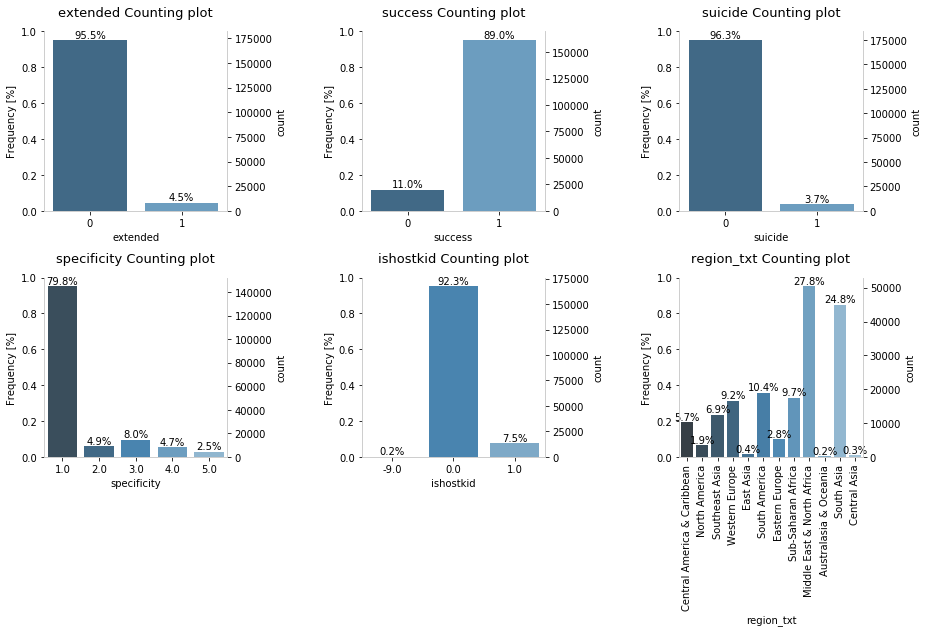

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(13, 7))
count_plot('extended', terr_data, ax=axs[0,0])
count_plot('success', terr_data, ax=axs[0,1])
count_plot('suicide', terr_data, ax=axs[0,2])
count_plot('specificity', terr_data, ax=axs[1,0])
count_plot('ishostkid', terr_data, ax=axs[1,1])
count_plot('region_txt', terr_data, ax=axs[1,2])
axs[1,2].set_xticklabels(axs[1,2].get_xticklabels(), rotation=90)
plt.show()

## Transformações nos Dados

Chegamos em uma parte crucial da preparação: o momento onde avaliamos aplicações de transformações significativas nos dados. Aqui, iremos investigar os seguintes tópicos:
* Coleta de informações de data através do atributo `eventid`;
* Criação de um atributo contendo informações de `dia da semana` do atentado;

### Coluna Event Date

In [29]:
# Criando atributo de data a partir de eventid
terr_data['eventid'] = terr_data['eventid'].astype(str)
terr_data['event_date'] = terr_data['eventid'].apply(lambda x: x[:4] + '/' + x[4:6] + '/' + x[6:8])
try: 
    terr_data['event_date'] = pd.to_datetime(terr_data['event_date'])
except ValueError as error:
    print(f'ValueError: {error}')

ValueError: month must be in 1..12


Vejam que uma exceção foi lançada. Aparentemente alguns dados transformados não puderam ser convertidos para o tipo datetime. Vamos investigar.

In [30]:
terr_data['event_date'][:5]

0    1970/00/00
1    1970/00/00
2    1970/01/00
3    1970/01/00
4    1970/01/00
Name: event_date, dtype: object

Algo estranho foi identificado: é possível que uma data tenha dia `0`? Será que isso foi um problema na função aplicada ou é algo intrínsico ao conjunto de dados? Vamos verificar

In [31]:
terr_data.iloc[:5, [0, 1, 2, 3, -1]]

atributo,eventid,iyear,imonth,iday,event_date
0,197000000001,1970,7,2,1970/00/00
1,197000000002,1970,0,0,1970/00/00
2,197001000001,1970,1,0,1970/01/00
3,197001000002,1970,1,0,1970/01/00
4,197001000003,1970,1,0,1970/01/00


Realmente, mesmo na coluna `iday` temos entradas identificando dia `0`. A forma mais adequada (talvez não a mais correta) de resolver essa situação é adicionar um dia em dias com entrada 0. Antes disso, vamos verificar se existe mais alguma incoerência nessa coluna e na coluna `imonth`, além de entradas `0`.

In [32]:
# Existem dias maiores que 31?
terr_data.query('iday > 31')

atributo,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,...,motive,nperps,weaptype1_txt,nkill,nkillter,nwound,nwoundte,ishostkid,nhostkid,event_date


In [33]:
# Existem mêses maiores que 12?
terr_data.query('imonth > 12')

atributo,eventid,iyear,imonth,iday,extended,country_txt,region_txt,city,latitude,longitude,...,motive,nperps,weaptype1_txt,nkill,nkillter,nwound,nwoundte,ishostkid,nhostkid,event_date


Aparentemente é mais seguro realizar essa transformação de data utilizando as colunas `iyear`, `imonth` e `iday`, dada que nenhuma inconsistência (além de dias e meses = 0) foi encontrada.

In [34]:
# Meses maiores que 12 na coluna transformada event_date
(terr_data['event_date'].apply(lambda x: x[5:7]).values.astype(int) > 12).any()

False

In [35]:
# Aplicando transformações nas colunas iday e imonth
terr_data['iday'] = terr_data['iday'].apply(lambda day: day + 1 if day == 0 else day)
terr_data['imonth'] = terr_data['imonth'].apply(lambda month: month + 1 if month == 0 else month)

# Verificando
print((terr_data['iday'] == 0).any())
print((terr_data['imonth'] == 0).any())

False
False


In [36]:
# Aplicando nova transformação
import numpy as np
year = terr_data['iyear'].astype(str)
month = terr_data['imonth'].astype(str)
day = terr_data['iday'].astype(str)
terr_data['event_date'] = year + "/" + month + "/" + day
terr_data['event_date'] = pd.to_datetime(terr_data['event_date'])
terr_data.iloc[:5, np.r_[:3, -1]]

atributo,eventid,iyear,imonth,event_date
0,197000000001,1970,7,1970-07-02
1,197000000002,1970,1,1970-01-01
2,197001000001,1970,1,1970-01-01
3,197001000002,1970,1,1970-01-01
4,197001000003,1970,1,1970-01-01


In [37]:
terr_data['event_date'].dtype

dtype('<M8[ns]')

Excelente!

### Coluna Dia da Semana

Com a criação da coluna `event_date` do tipo datetime, o caminho para a criação de uma nova coluna `day_of_week`, contemplando os dias da semana do atentado, é simples. Lembrando que, nessa abordagem do Python, Monday=0 e Sunday=6.

In [38]:
terr_data['day_of_week'] = terr_data['event_date'].apply(lambda x: x.dayofweek)
terr_data['day_of_week_name'] = terr_data['event_date'].dt.day_name()
terr_data.iloc[:10, np.r_[:3, -3, -2, -1]]

atributo,eventid,iyear,imonth,event_date,day_of_week,day_of_week_name
0,197000000001,1970,7,1970-07-02,3,Thursday
1,197000000002,1970,1,1970-01-01,3,Thursday
2,197001000001,1970,1,1970-01-01,3,Thursday
3,197001000002,1970,1,1970-01-01,3,Thursday
4,197001000003,1970,1,1970-01-01,3,Thursday
5,197001010002,1970,1,1970-01-01,3,Thursday
6,197001020001,1970,1,1970-01-02,4,Friday
7,197001020002,1970,1,1970-01-02,4,Friday
8,197001020003,1970,1,1970-01-02,4,Friday
9,197001030001,1970,1,1970-01-03,5,Saturday


# Conclusão

As pesquisas e análises aplicadas ao dataset Global Terrorism serviram de inspiração para a implementação de análises futuras, já mencionadas na introdução deste tópico. As transformações realizadas permitem concluir que o objetivo inicial foi alcançado e os dados foram preparados para serem trabalhados para a geração de insights através de visualizações.

Em um segundo notebook, estes mesmos dados serão utilizados de uma forma diferente: gerando visualizações e análises gráficas.